**Hotel Booking Analysis**

importing libraries

In [98]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading DataSet

In [101]:
#importing the dataset
df=pd.read_csv('Airbnb_Data.csv')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


Data Analysis and Cleaning

In [103]:
#checking index
df.index

RangeIndex(start=0, stop=74111, step=1)

In [104]:
#information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [105]:
#checking the first few rows of a dataset
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [106]:
#checking the last few rows of a dataset
df.tail()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0
74110,3534845,4.852030,Boat,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",4,1.0,Real Bed,moderate,False,...,33.761096,-118.192409,Cozy Boat at Shoreline Village,Long Beach,205,96.0,https://a0.muscache.com/im/pictures/22968537/d...,90802,1.0,2.0


In [107]:
# Column names
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [110]:
# Check the shape (rows, columns)
df.shape

(74111, 29)

In [116]:
#Summary stats for numeric columns
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [118]:
Null_rows=df.isnull().sum()
Null_rows

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [120]:
# Drop rows with too many missing values
df_clean = df.dropna(thresh=20)

In [122]:
# Fill specific missing values
df_clean['bedrooms'] = df_clean['bedrooms'].fillna(df_clean['bedrooms'].median())
df_clean['bathrooms'] = df_clean['bathrooms'].fillna(1)

In [124]:
# Convert date columns to datetime
df_clean['host_since'] = pd.to_datetime(df_clean['host_since'], errors='coerce')
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')

In [126]:
# Clean amenity text (optional: for analysis)
df_clean['amenities'] = df_clean['amenities'].str.replace('[{}"]', '', regex=True)

Data Filtering and Grouping

In [129]:
# Listings with WiFi and more than 2 bedrooms
filtered = df_clean[df_clean['amenities'].str.contains('WiFi') & (df_clean['bedrooms'] > 2)]
filtered

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds


In [131]:
# Listings in a specific city with rating above 90
high_rating = df_clean[(df_clean['city'] == 'New York') & (df_clean['review_scores_rating'] > 90)]
high_rating

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds


In [133]:
# Instant bookable and verified hosts
filtered_hosts = df_clean[(df_clean['instant_bookable'] == 't') & (df_clean['host_identity_verified'] == 't')]
filtered_hosts

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
4,3808709,4.744932,Apartment,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"TV,Wireless Internet,Heating,Smoke detector,Ca...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
13,2658946,5.298317,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",6,1.5,Real Bed,strict,True,...,38.919630,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0
22,3563677,4.905275,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",4,1.0,Real Bed,moderate,True,...,34.047003,-118.267352,"LOFT WITH VIEW, Convention center!",Downtown,73,99.0,https://a0.muscache.com/im/pictures/d1a617c2-5...,90015,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74087,15042259,4.477337,Apartment,Entire home/apt,"TV,Wireless Internet,Air conditioning,Pool,Kit...",4,1.0,Real Bed,strict,True,...,34.048172,-118.262090,Opening Sale : Great Value IN DTLA,Downtown,5,100.0,https://a0.muscache.com/im/pictures/751551d4-3...,90017,0.0,2.0
74092,18395940,4.700480,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",4,2.0,Real Bed,strict,True,...,41.910698,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610,2.0,3.0
74097,15952947,4.700480,Apartment,Private room,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Real Bed,flexible,True,...,40.740904,-74.002948,Room in Beautiful Downtown Duplex,Chelsea,31,92.0,https://a0.muscache.com/im/pictures/77562b35-c...,10011.0,1.0,1.0
74099,4615631,4.276666,Condominium,Private room,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,moderate,True,...,34.096308,-118.348016,Luxury Condo in West Hollywood!!!,NaN,50,96.0,https://a0.muscache.com/im/pictures/d0d80b5d-a...,90046,1.0,1.0


In [135]:
# Listings with more than 3 bathrooms OR more than 4 bedrooms
df_filtered = df_clean[(df_clean['bathrooms'] > 3) | (df_clean['bedrooms'] > 4)]
df_filtered

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
276,3219171,4.521789,House,Entire home/apt,"TV,Wireless Internet,Air conditioning,Kitchen,...",10,4.5,Real Bed,flexible,True,...,33.872121,-118.035269,"Quiet 5 Bedroom Home, Family Ready",Cerritos,0,NaN,https://a0.muscache.com/im/pictures/3ab7c3a1-0...,90703,5.0,5.0
279,13309996,5.220356,House,Private room,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,5.0,Real Bed,strict,False,...,34.106364,-118.209813,Beautiful Mini Mansion,NaN,0,NaN,https://a0.muscache.com/im/pictures/2ff64d9f-b...,90065,1.0,5.0
347,20773540,6.856462,House,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",8,4.0,Real Bed,moderate,True,...,34.077563,-118.374955,Modern Moroccan Pool Paradise near WEHO/Bev Ce...,Mid-Wilshire,12,98.0,https://a0.muscache.com/im/pictures/d7cb9932-d...,90048,4.0,4.0
357,6473307,4.248495,Apartment,Private room,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,4.0,Real Bed,strict,False,...,34.100996,-118.328577,MY HOLLYWOOD SPACE RENTALS - #12,NaN,187,94.0,https://a0.muscache.com/im/pictures/52981783/3...,90028,1.0,1.0
401,19839317,7.569412,Villa,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",8,3.5,Real Bed,super_strict_60,True,...,34.068347,-118.373981,Modern Luxury: 116852,NaN,1,100.0,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73980,447979,5.517453,House,Entire home/apt,"TV,Wireless Internet,Air conditioning,Kitchen,...",15,4.0,Real Bed,strict,True,...,38.932094,-76.967675,5BR/4 Full Bath Luxury Vacation Rental on 1/4 ...,Woodridge,5,96.0,https://a0.muscache.com/im/pictures/3541fe41-4...,20018,5.0,10.0
74031,189787,6.907755,Villa,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",8,5.0,Real Bed,strict,True,...,34.115600,-118.296714,Glendower Estate,Hollywood Hills,4,100.0,NaN,90027,5.0,5.0
74032,16659768,5.616771,House,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",10,3.5,Real Bed,strict,True,...,38.908098,-77.047862,GORGEOUS Huge PERFECTLY Located 3BR 4 BED + GA...,Dupont Circle,28,89.0,NaN,20036,3.0,4.0
74042,16274884,5.703782,House,Entire home/apt,"TV,Internet,Wireless Internet,Kitchen,Free par...",8,1.5,Real Bed,strict,True,...,42.280757,-71.153214,The 1880 House: Historic Single Family Victorian!,West Roxbury,7,100.0,https://a0.muscache.com/im/pictures/4df663bd-f...,02132,5.0,5.0


In [137]:
# Listings NOT in a specific city
df_filtered = df_clean[df_clean['city'] != 'San Francisco']
df_filtered

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,,1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"TV,Wireless Internet,Air conditioning,Kitchen,...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [139]:
# Listings where host has profile pic and is verified
df_filtered = df_clean[(df_clean['host_has_profile_pic'] == 't') & (df_clean['host_identity_verified'] == 't')]
df_filtered

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"Wireless Internet,Air conditioning,Kitchen,Hea...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
2,7919400,4.976734,Apartment,Entire home/apt,"TV,Cable TV,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"TV,Wireless Internet,Heating,Smoke detector,Ca...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,14934112,4.356709,Apartment,Entire home/apt,"TV,Cable TV,Internet,Wireless Internet,Air con...",2,1.0,Real Bed,strict,True,...,41.909067,-87.623046,Gold Coast Specialty,NaN,6,100.0,https://a0.muscache.com/im/pictures/32922903/b...,60610,1.0,1.0
74105,808802,4.248495,House,Private room,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,moderate,True,...,34.092640,-118.343921,Private Bed/Bathroom in Cute House!,NaN,36,91.0,https://a0.muscache.com/im/pictures/ae2e48de-6...,90038,1.0,1.0
74106,14549287,4.605170,Apartment,Private room,,1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74108,18688039,5.220356,Apartment,Entire home/apt,"TV,Internet,Wireless Internet,Air conditioning...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


In [141]:
# Average rating per city
city_rating = df_clean.groupby('city')['review_scores_rating'].mean()
city_rating

city
Boston     93.597518
Chicago    95.102868
DC         94.827317
LA         94.305714
NYC        93.506553
SF         95.023777
Name: review_scores_rating, dtype: float64

In [143]:
# Count listings per room type
room_counts = df_clean['room_type'].value_counts()
room_counts

room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64

In [ ]:
# Listings with most reviews
top_reviews = df_clean.groupby('name')['number_of_reviews'].sum().sort_values(ascending=False).head(10)
top_reviews

In [29]:
# Group filtered data: Listings with high rating (above 90), grouped by city
high_rating = df_clean[df_clean['review_scores_rating'] > 90]
city_high_rating = high_rating.groupby('city')['log_price'].mean()
city_high_rating

city
Boston     4.895140
Chicago    4.613843
DC         4.825368
LA         4.730581
NYC        4.735040
SF         5.152223
Name: log_price, dtype: float64

In [30]:
# Listings with WiFi and instant bookable, grouped by neighbourhood
wifi_instant = df_clean[df_clean['amenities'].str.contains('WiFi') & (df_clean['instant_bookable'] == 't')]
grouped_wifi = wifi_instant.groupby('neighbourhood')['log_price'].mean()
grouped_wifi

Series([], Name: log_price, dtype: float64)

Aggregations

In [32]:
# Average price by property type
df.groupby('property_type')['log_price'].mean()

property_type
Apartment             4.758850
Bed & Breakfast       4.556068
Boat                  5.200865
Boutique hotel        5.083352
Bungalow              4.783268
Cabin                 4.646499
Camper/RV             4.602238
Casa particular       4.382027
Castle                5.368424
Cave                  4.909373
Chalet                4.764325
Condominium           5.026539
Dorm                  3.746140
Earth House           5.285391
Guest suite           4.717513
Guesthouse            4.685184
Hostel                3.647333
House                 4.797114
Hut                   4.022837
In-law                4.816649
Island                5.010635
Lighthouse            5.521461
Loft                  5.007919
Other                 4.946367
Parking Space         4.605170
Serviced apartment    5.147467
Tent                  4.197131
Timeshare             5.602600
Tipi                  5.246118
Townhouse             4.833539
Train                 5.204399
Treehouse             4.8

In [36]:
# Count of listings per room type
df.groupby('room_type')['id'].count()

room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: id, dtype: int64

In [41]:
# Median rating by cancellation policy
df.groupby('cancellation_policy')['review_scores_rating'].median()

cancellation_policy
flexible            97.0
moderate            97.0
strict              96.0
super_strict_30     92.0
super_strict_60    100.0
Name: review_scores_rating, dtype: float64

In [44]:
# Count how many listings are priced above 1000 per city
df.groupby('city')['log_price'].apply(lambda x: (x > 1000).sum())

city
Boston     0
Chicago    0
DC         0
LA         0
NYC        0
SF         0
Name: log_price, dtype: int64

Data Visualisation

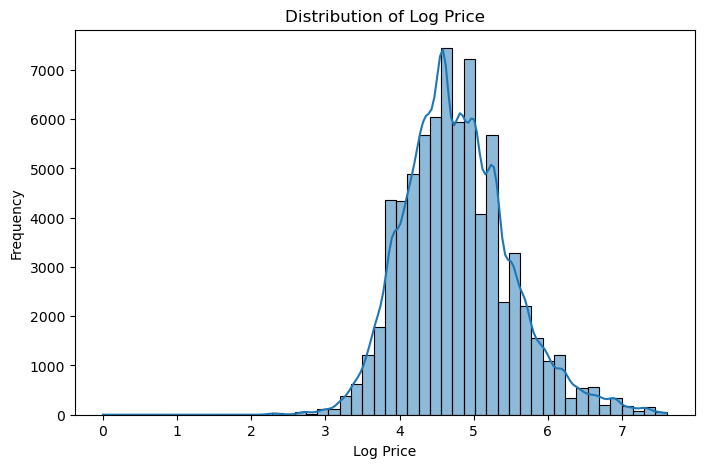

In [96]:
#Hist plot
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

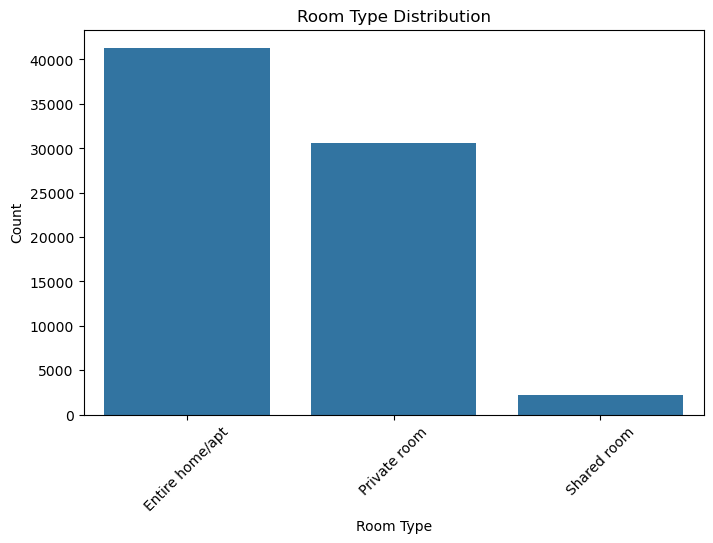

In [94]:
#count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

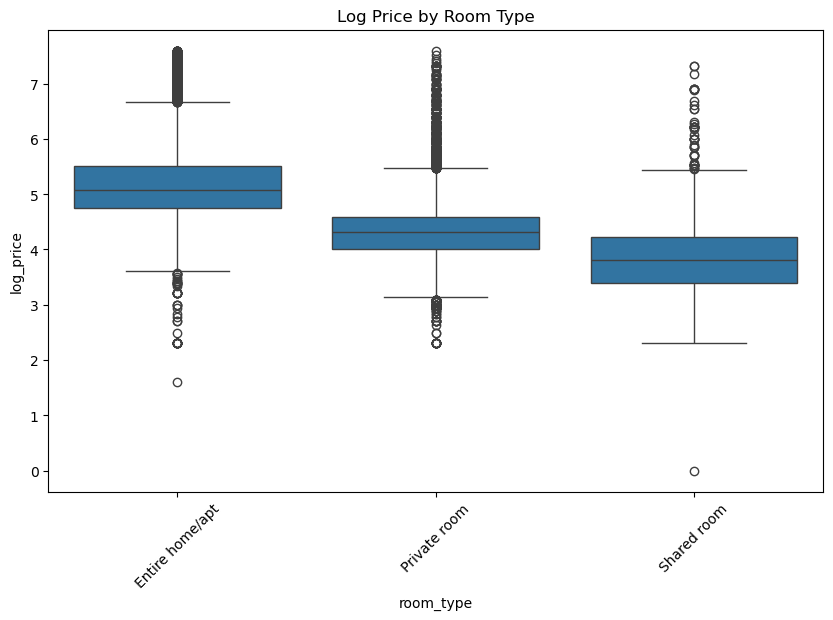

In [70]:
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='log_price')
plt.title('Log Price by Room Type')
plt.xticks(rotation=45)
plt.show()

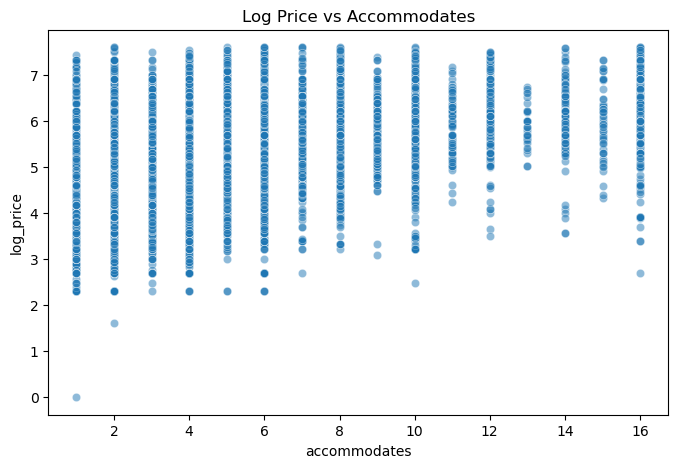

In [92]:
#scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='accommodates', y='log_price', alpha=0.5)
plt.title('Log Price vs Accommodates')
plt.show()

In [90]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_year'] = df['host_since'].dt.year

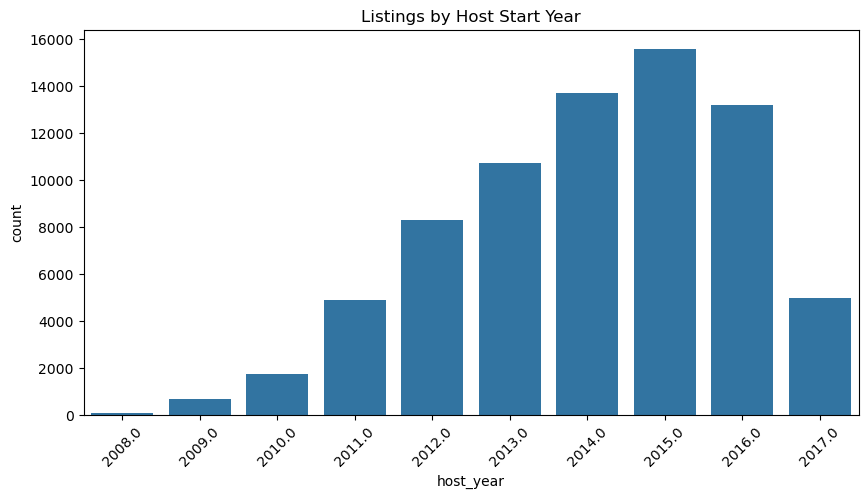

In [82]:
#plotting count plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='host_year')
plt.title('Listings by Host Start Year')
plt.xticks(rotation=45)
plt.show()

In [84]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [86]:
# Compute correlation matrix
corr_matrix = numerical_df.corr()

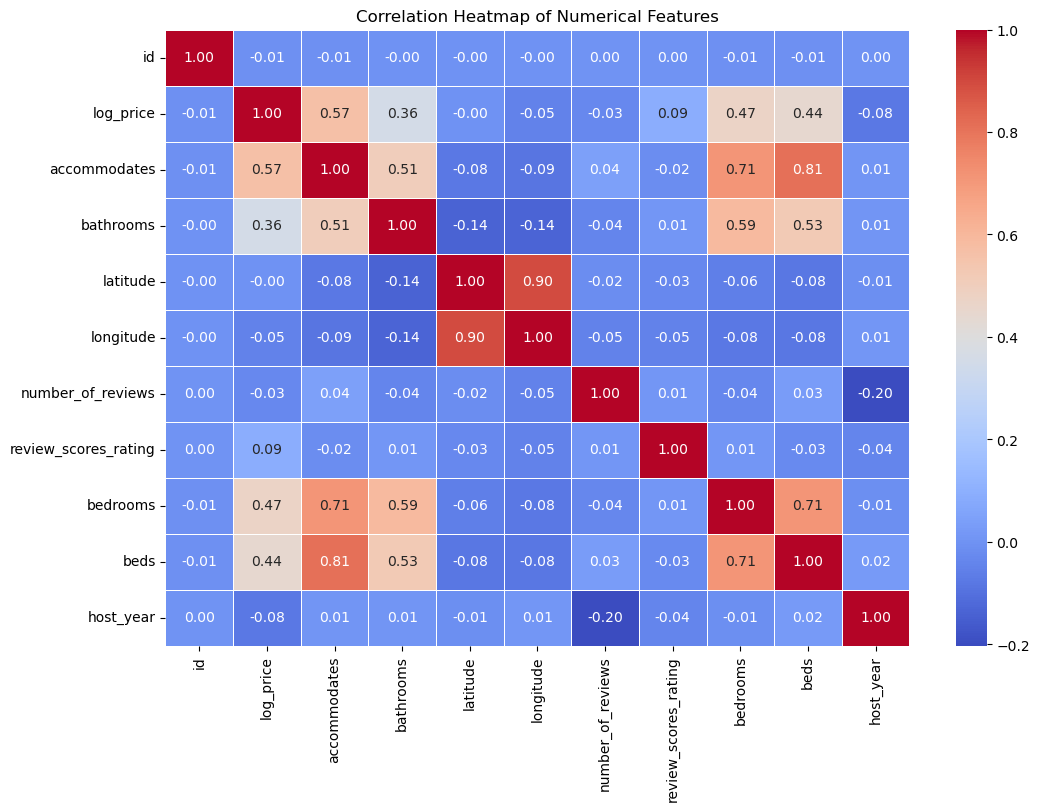

In [88]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()